In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [8]:
data_folder = '\\Users\\qandr_000\\Desktop\\Astro-Labs\\lab9\\radio-astronomy-galactic-rotation\\galaxyData' #Accidentally named folder lab9 instead of lab8 and I cannot rename the folder while it's in use.

galpos_files = glob.glob(data_folder + "\\galpos*") #This command grabs all of the files starting with "galpol" in your data folder.
galpos_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command.
pole_files = glob.glob(data_folder + "\\calib*")
pole_files.sort()

In [9]:
gal_freq = [] # Create an empty array to later hold each of the spectra from the 21 cm frequency.

for galpos_file in galpos_files: #Pull each individual filename from the list of azimuth files
    
    with open(galpos_file) as gal_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(gal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
        tot_spectrum = tot_spectrum / np.shape(spectrum_rows)
        gal_freq.append(tot_spectrum)

In [10]:
pol_freq = [] # Create an empty array to later hold each of the spectra from the 21 cm frequency.

for pole_file in pole_files: #Pull each individual filename from the list of azimuth files
    
    with open(pole_file) as pole_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(pole_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
        tot_spectrum = tot_spectrum / np.shape(spectrum_rows)
        pol_freq.append(tot_spectrum)

In [33]:
pol_freq = np.asarray(pol_freq)
gal_freq = np.asarray(gal_freq)

cal_gal_freq = gal_freq - pol_freq #Corrects for the background.
print(gal_freq)

130.31639423076888


Text(0,0.5,'flux count')

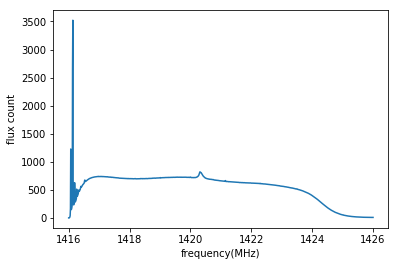

In [38]:
freq = np.linspace(1416,1426,1024) #This section was made just to create the graphs wanted in the report.
plt.plot(freq,gal_freq[0])
plt.xlabel('frequency(MHz)')
plt.ylabel('flux count')

Text(0,0.5,'flux count')

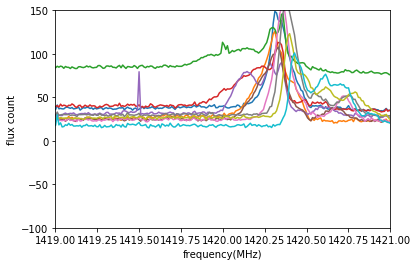

In [35]:
rest_freq = 1420.4057517667 #This is the hydrogen rest line, used for each specific graph.



freq = np.linspace(1416,1426,1024) #Sets the correct range and the binning for it.
for i in range(0,10):
    plt.plot(freq,cal_gal_freq[i]) #Plots each longitude spectrum.
plt.ylim([-100,150])
plt.xlim([1419,1421]) #These two lines of code "zoom" in on the graph, used for each spectrum graph below.
plt.xlabel('frequency(MHz)')
plt.ylabel('flux count')

In [43]:
plt.plot(freq,cal_gal_freq[0]) #Plots just longitude 00; similar code (but for each longitude) for the following graphs
plt.ylim([-100,150]) 
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.2,color='g') #This plots the best line for each specific longitude; applies to each graph.

In [41]:
plt.plot(freq,cal_gal_freq[1])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.1,color='g')

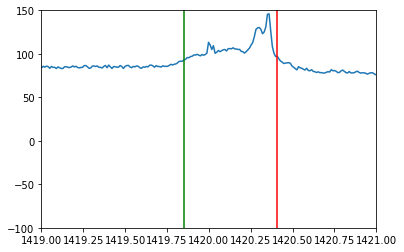

In [46]:
plt.plot(freq,cal_gal_freq[2])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1419.85,color='g')

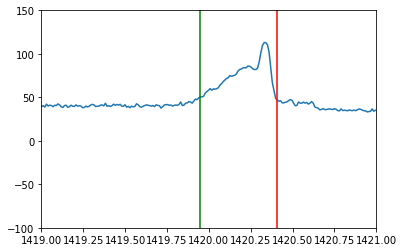

In [49]:
plt.plot(freq,cal_gal_freq[3])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1419.95,color='g')

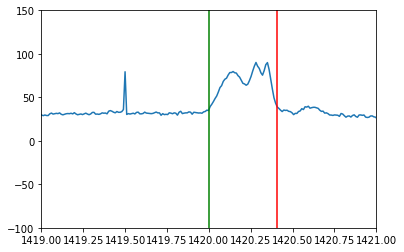

In [50]:
plt.plot(freq,cal_gal_freq[4])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420,color='g')

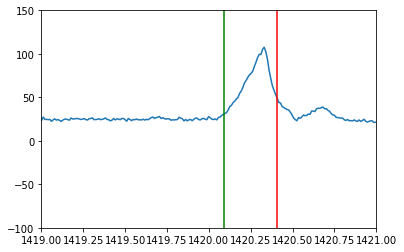

In [53]:
plt.plot(freq,cal_gal_freq[5])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.09,color='g')

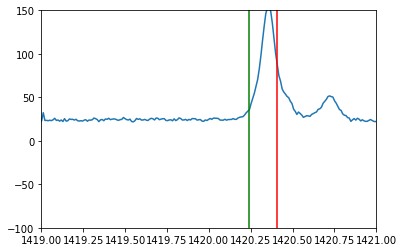

In [56]:
plt.plot(freq,cal_gal_freq[6])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.24,color='g')

In [59]:
plt.plot(freq,cal_gal_freq[7])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.28,color='g')

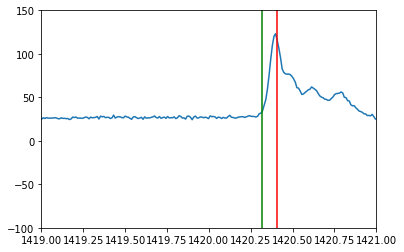

In [61]:
plt.plot(freq,cal_gal_freq[8])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.32,color='g')

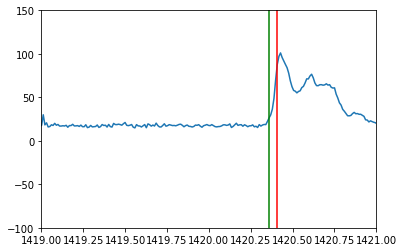

In [63]:
plt.plot(freq,cal_gal_freq[9])
plt.ylim([-100,150])
plt.xlim([1419,1421])
plt.axvline(rest_freq,color='r')
plt.axvline(1420.36,color='g')

In [65]:
def velcal(x):
    vel = (2.99 * 10**5) * (1 - (x / 1420.4057517667)) #This is a function that tells me velocity in km/s with a given frequency.
    return vel

In [74]:
v0 = velcal(1420.2) #These calculate the relative velocity with their given frequencies. PS I know there is a better way to code a lot of this, but I am tired and just want to get the answers.
v1 = velcal(1420.1)
v2 = velcal(1419.85)
v3 = velcal(1419.95)
v4 = velcal(1420)
v5 = velcal(1420.09)
v6 = velcal(1420.24)
v7 = velcal(1420.28)
v8 = velcal(1420.32)
v9 = velcal(1420.36)
corv0 = v0 #These calculations correct for the sun's motion.
corv1 = v1 + (220 * 0.1736481777)
corv2 = v2 + (220 * 0.3420201433)
corv3 = v3 + (220 * 0.5)
corv4 = v4 + (220 * 0.6427876097)
corv5 = v5 + (220 * 0.7660444431)
corv6 = v6 + (220 * 0.8660254038)
corv7 = v7 + (220 * 0.9396926208)
corv8 = v8 + (220 * 0.984807753)
corv9 = v9 + 220
corv = [] #Makes an array of all values for velocity.
corv.append(corv0)
corv.append(corv1)
corv.append(corv2)
corv.append(corv3)
corv.append(corv4)
corv.append(corv5)
corv.append(corv6)
corv.append(corv7)
corv.append(corv8)
corv.append(corv9)
rad = [0, 1.48, 2.91, 4.25, 5.46, 6.51, 7.36, 7.99, 8.37, 8.5] #Makes the array for the distances from the center of the galaxy.

plt.plot(rad,corv)
plt.xlabel('radius (kpc)')
plt.ylabel('velocity (km/s)')
plt.errorbar(0, 43.3114, yerr=10, fmt='.k')
plt.errorbar(1.48, 102.5643, yerr=10, fmt='.k')
plt.errorbar(2.91, 192.2320, yerr=25, fmt='.k')
plt.errorbar(4.25, 205.9372, yerr=20, fmt='.k')
plt.errorbar(5.46, 226.8253, yerr=10, fmt='.k')
plt.errorbar(6.51, 234.9965, yerr=10, fmt='.k')
plt.errorbar(7.36, 225.4169, yerr=5, fmt='.k')
plt.errorbar(7.99, 233.2035, yerr=5, fmt='.k')
plt.errorbar(8.37, 234.7087, yerr=5, fmt='.k')
plt.errorbar(8.5, 229.6309, yerr=5, fmt='.k')

<ErrorbarContainer object of 3 artists>

In [70]:
print(corv) #Needed to see all the values for the error bars.

[43.311411663015555, 102.56433385156336, 192.23197401983325, 205.93721939928545, 226.82533198604477, 234.99654454901147, 225.41687126122298, 233.20352976339723, 234.7087296096047, 229.63089471181212]
